In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/home/astrosun/jtlaune/athena/vis/python')
import athena_read
%matplotlib widget

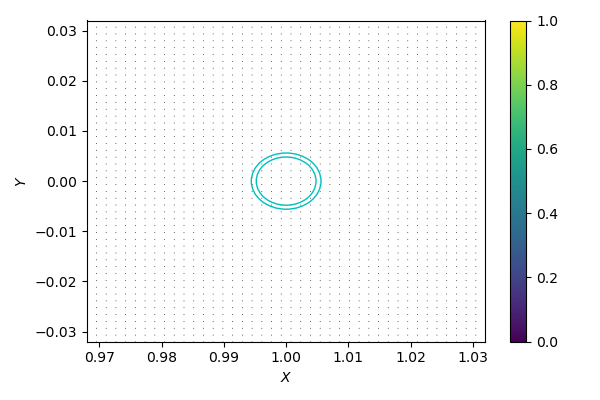

In [17]:
os.chdir("/home/astrosun/jtlaune/athena/work-accretion/")
data0 = athena_read.athdf("ppd_cyl.out1.00000.athdf")
rho0 = data0["dens"][0,:,:]
vr0 = data0["mom1"][0,::1,::1]/data0["dens"][0,::1,::1]
vth0 = data0["mom2"][0,::1,::1]/data0["dens"][0,::1,::1]

data = athena_read.athdf("ppd_cyl.out1.00100.athdf")
rho = data["dens"][0,:,:]
vr = data["mom1"][0,::1,::1]/data["dens"][0,::1,::1]
vth = data["mom2"][0,::1,::1]/data["dens"][0,::1,::1]

coordsr, coordsth = np.meshgrid(data["x1v"], data["x2v"])
coordsx = coordsr*np.cos(coordsth)
coordsy = coordsr*np.sin(coordsth)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim((0.968,1.032)), ax.set_ylim((-0.032,0.032))
cs1 = ax.quiver(data["x1v"], data["x2v"], 
                    vr, vth)#,shading="auto", norm=colors.LogNorm())
ax = plt.gca()
circ = plt.Circle((1, 0), 0.0048, color='c', fill=False)
ax.add_patch(circ)
circ = plt.Circle((1, 0), 0.0056, color='c', fill=False)
ax.add_patch(circ)


fig.colorbar(cs1)
ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$Y$")

#fig.colorbar(cs2)
#ax.set_title("integrator=vl2 & xorder=2")
fig.tight_layout()



In [13]:
len(data["x1v"])

768

In [2]:
nomTorque = -1e-4**2/0.05**2
print(nomTorque)
bondiNorm = -1e-4**2/0.05**3
print(bondiNorm)

-3.999999999999999e-06
-7.999999999999998e-05


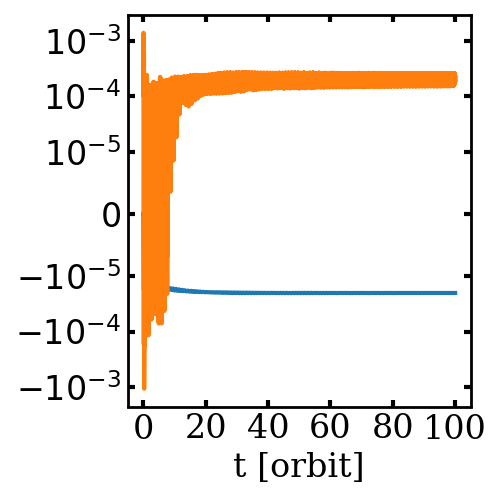

In [19]:
@mpl.rc_context(analytic)
def plot():
    fig, ax = plt.subplots(figsize=(5,5))

    #os.chdir("/home/astrosun/jtlaune/athena/work-accretion/fast-lowres-accrete-1e-4")
    #os.chdir("/home/astrosun/jtlaune/athena/work-accretion/fast-lowres-fiducial-1e-4/")
    #hst = np.loadtxt("ppd_cyl.hst")
    #t=hst[:,0]/np.pi/2
    #Fsgrav_x=hst[:,-5]
    #Fsgrav_y=hst[:,-4]
    #accrate=hst[:,-3]
    #momx_accrate =hst[:,-2]
    #momy_accrate =hst[:,-1]
    #ax.plot(t, momy_accrate)

    os.chdir("/home/astrosun/jtlaune/athena/work-accretion/fast-lowres-accrete-1e-4")
    #os.chdir("/home/astrosun/jtlaune/athena/work-accretion/fast-lowres-fiducial-1e-4")
    hst = np.loadtxt("ppd_cyl.hst")
    t=hst[:,0]/np.pi/2
    Fsgrav_x=hst[:,-5]
    Fsgrav_y=hst[:,-4]
    accrate=hst[:,-3]
    momx_accrate =hst[:,-2]
    momy_accrate =hst[:,-1]
    ax.plot(t, Fsgrav_y)
    ax.plot(t, momy_accrate)
    ax.set_yscale("symlog", linthresh=1e-5)
    #ax.axhline(y=nomTorque,c="k",ls="--")

    #ax.set_xlim((0,t[-1]))
    ax.set_xlabel(r"t [orbit]")
    fig.tight_layout()
plot()

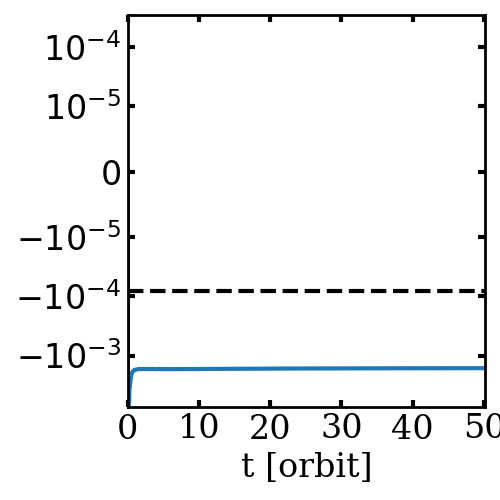

In [21]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work-accretion/")
    hst = np.loadtxt("ppd_cyl.hst")
    t=hst[:,0]/np.pi/2
    fig, ax = plt.subplots(figsize=(5,5))
    Fsgrav_x=hst[:,-5]
    Fsgrav_y=hst[:,-4]
    accrate=hst[:,-3]
    momx_accrate =hst[:,-2]
    momy_accrate =hst[:,-1]
    ax.plot(t, accrate)
    ax.axhline(y=bondiNorm,c="k",ls="--")
    ax.set_xlim((0,t[-1]))
    ax.set_xlabel(r"t [orbit]")
    ax.set_yscale("symlog", linthresh=1e-5)
    fig.tight_layout()
plot()